In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [2]:
df = pd.read_csv("data/california_housing_processed.csv")

X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


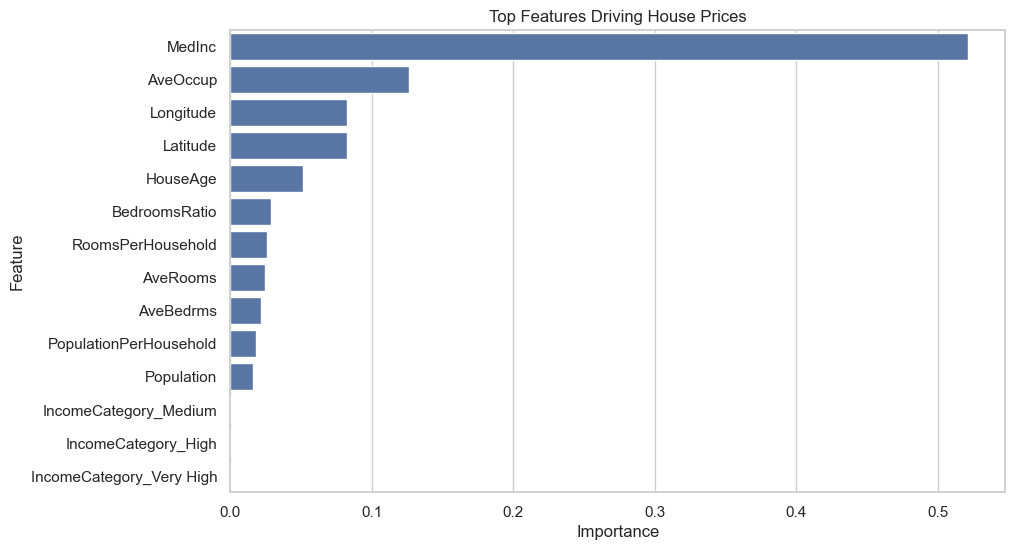

In [4]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 15 features
top_features = importances.head(15)

sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Top Features Driving House Prices")
plt.show()


Business interpretation

Median income dominates pricing

Location strongly affects valuation

Room density & population explain comfort & demand

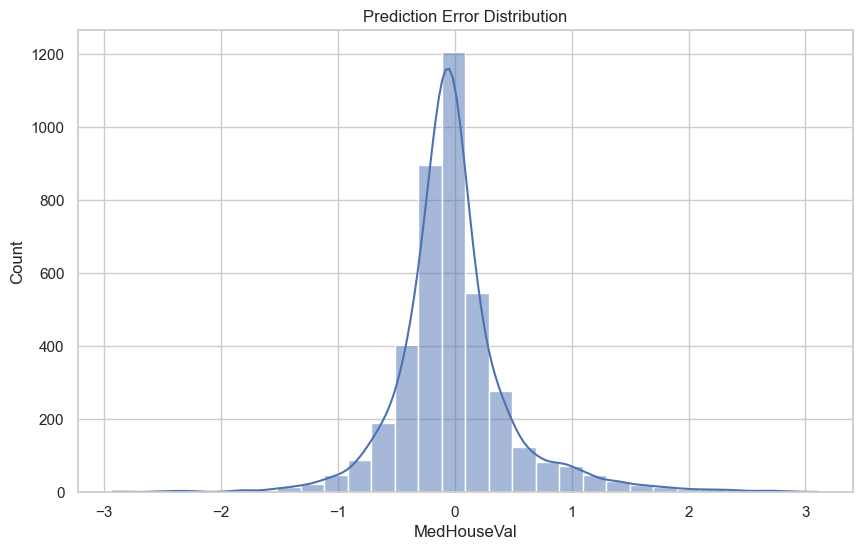

In [5]:
y_pred = rf.predict(X_test)
errors = y_test - y_pred

sns.histplot(errors, bins=30, kde=True)
plt.title("Prediction Error Distribution")
plt.show()


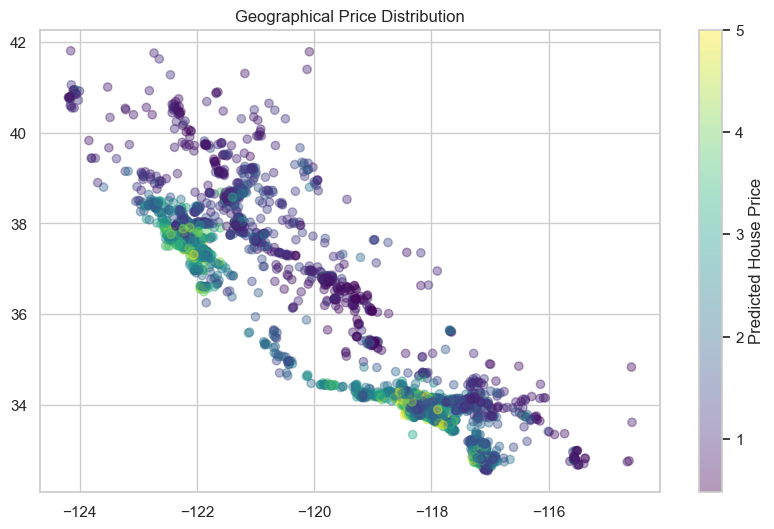

In [6]:
plt.scatter(
    X_test['Longitude'], 
    X_test['Latitude'], 
    c=y_pred, 
    cmap='viridis', 
    alpha=0.4
)
plt.colorbar(label='Predicted House Price')
plt.title("Geographical Price Distribution")
plt.show()


### Business Insights
1. Income level is the strongest predictor of house prices.
2. Location significantly impacts valuation, especially coastal areas.
3. Housing density metrics improve model understanding of comfort and congestion.
4. The model performs well for mid-range prices but struggles with extreme luxury homes.

### Use Case
This system can support:
- Real estate pricing strategies
- Investment decision-making
- Urban planning analysis
